# 1. Imports

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [2]:
%matplotlib inline


# 2. GPU checking 

In [3]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)

1 Physical GPUs, 1 Logical GPUs


In [4]:
print("Num GPUs avaiable: :", len(tf.config.experimental.list_physical_devices("GPU")))
print(tf.test.gpu_device_name())

Num GPUs avaiable: : 1
/device:GPU:0


In [5]:
if tf.test.gpu_device_name(): 

    print('Default GPU Device:{}'.format(tf.test.gpu_device_name()))

else:

   print("Please install GPU version of TF")

Default GPU Device:/device:GPU:0


In [6]:
os.environ['CUDA_VISIBLE_DEVICES'] = '1'

# 3. Import data 

In [7]:
train_data_filepath = '/data/train/'
test_data_filepath = '/data/test/'
labels_filepath = '/data/labels.csv'

In [8]:
labels_dataframe = pd.read_csv(labels_filepath)
labels_dataframe.head()

id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

In [9]:
labels_dataframe = labels_dataframe.sample(frac=1)

In [10]:
labels_dataframe.head()

id            breed
6173  9b68b5724c63b5127703bce31dd1fa65           briard
8156  cbe1e05f5c6a9cad9e5afa6e86dda4c0         papillon
9307  e99886bf590f8e0cb3394f91e8920ae2  norwich_terrier
712   118060ca946af5cfd1b3bbe030f9003c      boston_bull
8920  dfdb153c5100737c782c5f9578717594          basenji

In [11]:
print(labels_dataframe.id[0] + ".jpg")

000bec180eb18c7604dcecc8fe0dba07.jpg


In [12]:
filenames = [filename + ".jpg" for filename in labels_dataframe.id]

In [13]:
filenames

130a897dbaf560aa0650a.jpg',
 '475171ec5847e4df41847e295b8cfca2.jpg',
 '8935b2cad46c4030aa0801ae1415cb90.jpg',
 '0ea5759640f2e1c2d1a06adaf8a54ca7.jpg',
 '26caaf6663453fab159f7a4217f6d769.jpg',
 '62d2ba5285d382f21cae068bdc4b5afa.jpg',
 'ec53887c5887ec7be3693459ad3ba4ed.jpg',
 '8b7b0f3b6474962448c419ed8c46712a.jpg',
 'a6eb4c19bbe8efd5d4fc9ac41e0cba4b.jpg',
 '1312009d41a9488bf5dc0af0289b0657.jpg',
 '1a4384c7ec054a88d81f8f6ee6901a56.jpg',
 '40769dc3fc3727345a2359003df5b677.jpg',
 'deeffdd5ee6aac9f7fa2f31a89e07498.jpg',
 'ae041dda85d54e44e581ab76f536208a.jpg',
 '7515d9c6b41d7b8bb0c7fda05278e16d.jpg',
 '28324516db1ad19c3b33c1b6ad397774.jpg',
 'b3e2de0e9d1a5c6c180277b87b85971f.jpg',
 '8ae1475b493ceb4dc93924ccdf1f98cd.jpg',
 'cc964d3bf1e317c9fbb0c0d4c8bc6b8f.jpg',
 '3aebe0afad42ce5d1c29472050b67380.jpg',
 '22317b4ca72c1032498d42f1a35e1fdb.jpg',
 'da39ac1c77a8bc5ee24f592495e9f885.jpg',
 '3a1eeae505c9fedcfd97d3eaa94c3c66.jpg',
 'd70233cd858bc0dd50ed351ae30a5432.jpg',
 '89cbfc8c3745a9c14c2b73765f3

In [14]:
labels = labels_dataframe.breed

In [15]:
labels.head()

6173             briard
8156           papillon
9307    norwich_terrier
712         boston_bull
8920            basenji
Name: breed, dtype: object

In [16]:
train_dataframe = pd.DataFrame(zip(filenames[:8000], labels[:8000]), columns=['filename', 'breed'])
val_dataframe = pd.DataFrame(zip(filenames[8000:], labels[8000:]), columns=['filename', 'breed'])

In [17]:
train_dataframe.head()

filename            breed
0  9b68b5724c63b5127703bce31dd1fa65.jpg           briard
1  cbe1e05f5c6a9cad9e5afa6e86dda4c0.jpg         papillon
2  e99886bf590f8e0cb3394f91e8920ae2.jpg  norwich_terrier
3  118060ca946af5cfd1b3bbe030f9003c.jpg      boston_bull
4  dfdb153c5100737c782c5f9578717594.jpg          basenji

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=(1./255),
                                    rotation_range=40,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=(1./255))

train_generator = train_datagen.flow_from_dataframe(dataframe=train_dataframe,
                                                   directory=train_data_filepath,
                                                   x_col="filename",
                                                   y_col="breed",
                                                   target_size=(256,256),
                                                   batch_size=32,
                                                   class_mode="categorical",
                                                   shuffle=True)

val_generator = val_datagen.flow_from_dataframe(dataframe=val_dataframe,
                                               directory=train_data_filepath,
                                               x_col="filename",
                                               y_col="breed",
                                               target_size=(256,256),
                                               batch_size=32,
                                               class_mode="categorical",
                                               shuffle=True)

Found 8000 validated image filenames belonging to 120 classes.
Found 2222 validated image filenames belonging to 120 classes.


In [19]:
train_generator.class_indices

{'affenpinscher': 0,
 'afghan_hound': 1,
 'african_hunting_dog': 2,
 'airedale': 3,
 'american_staffordshire_terrier': 4,
 'appenzeller': 5,
 'australian_terrier': 6,
 'basenji': 7,
 'basset': 8,
 'beagle': 9,
 'bedlington_terrier': 10,
 'bernese_mountain_dog': 11,
 'black-and-tan_coonhound': 12,
 'blenheim_spaniel': 13,
 'bloodhound': 14,
 'bluetick': 15,
 'border_collie': 16,
 'border_terrier': 17,
 'borzoi': 18,
 'boston_bull': 19,
 'bouvier_des_flandres': 20,
 'boxer': 21,
 'brabancon_griffon': 22,
 'briard': 23,
 'brittany_spaniel': 24,
 'bull_mastiff': 25,
 'cairn': 26,
 'cardigan': 27,
 'chesapeake_bay_retriever': 28,
 'chihuahua': 29,
 'chow': 30,
 'clumber': 31,
 'cocker_spaniel': 32,
 'collie': 33,
 'curly-coated_retriever': 34,
 'dandie_dinmont': 35,
 'dhole': 36,
 'dingo': 37,
 'doberman': 38,
 'english_foxhound': 39,
 'english_setter': 40,
 'english_springer': 41,
 'entlebucher': 42,
 'eskimo_dog': 43,
 'flat-coated_retriever': 44,
 'french_bulldog': 45,
 'german_shepherd'

# Data augmentation visualization

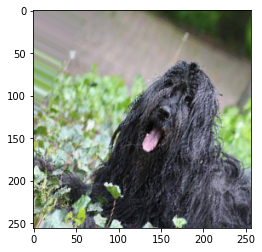

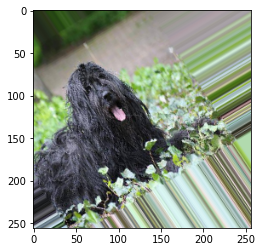

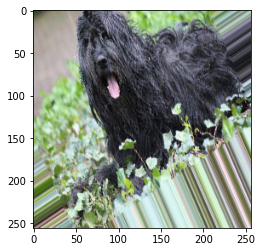

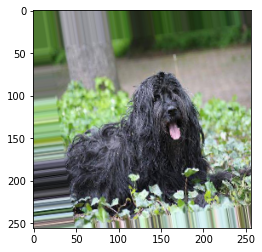

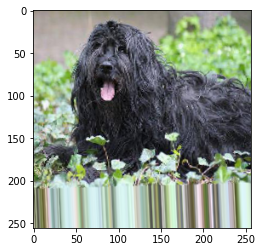

In [20]:
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img
img_path = os.path.join(train_data_filepath, train_dataframe['filename'][0])
img = load_img(img_path, target_size=(256, 256))
x = img_to_array(img)
x = x.reshape((1,) + x.shape)

i = 0 
for batch in train_datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(array_to_img(batch[0]))
    i += 1
    if i % 5 == 0:
        break


# Visualizating training data 

In [21]:
images, label = next(val_generator)

In [22]:
label[0].argmax()

13

In [23]:
labels_list = list(val_generator.class_indices)
labels_list[32]

'cocker_spaniel'

In [24]:
images[0].shape

(256, 256, 3)

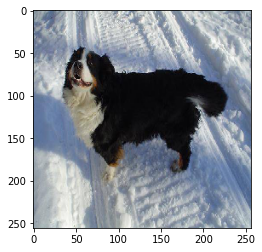

In [25]:
plt.imshow(images[31])

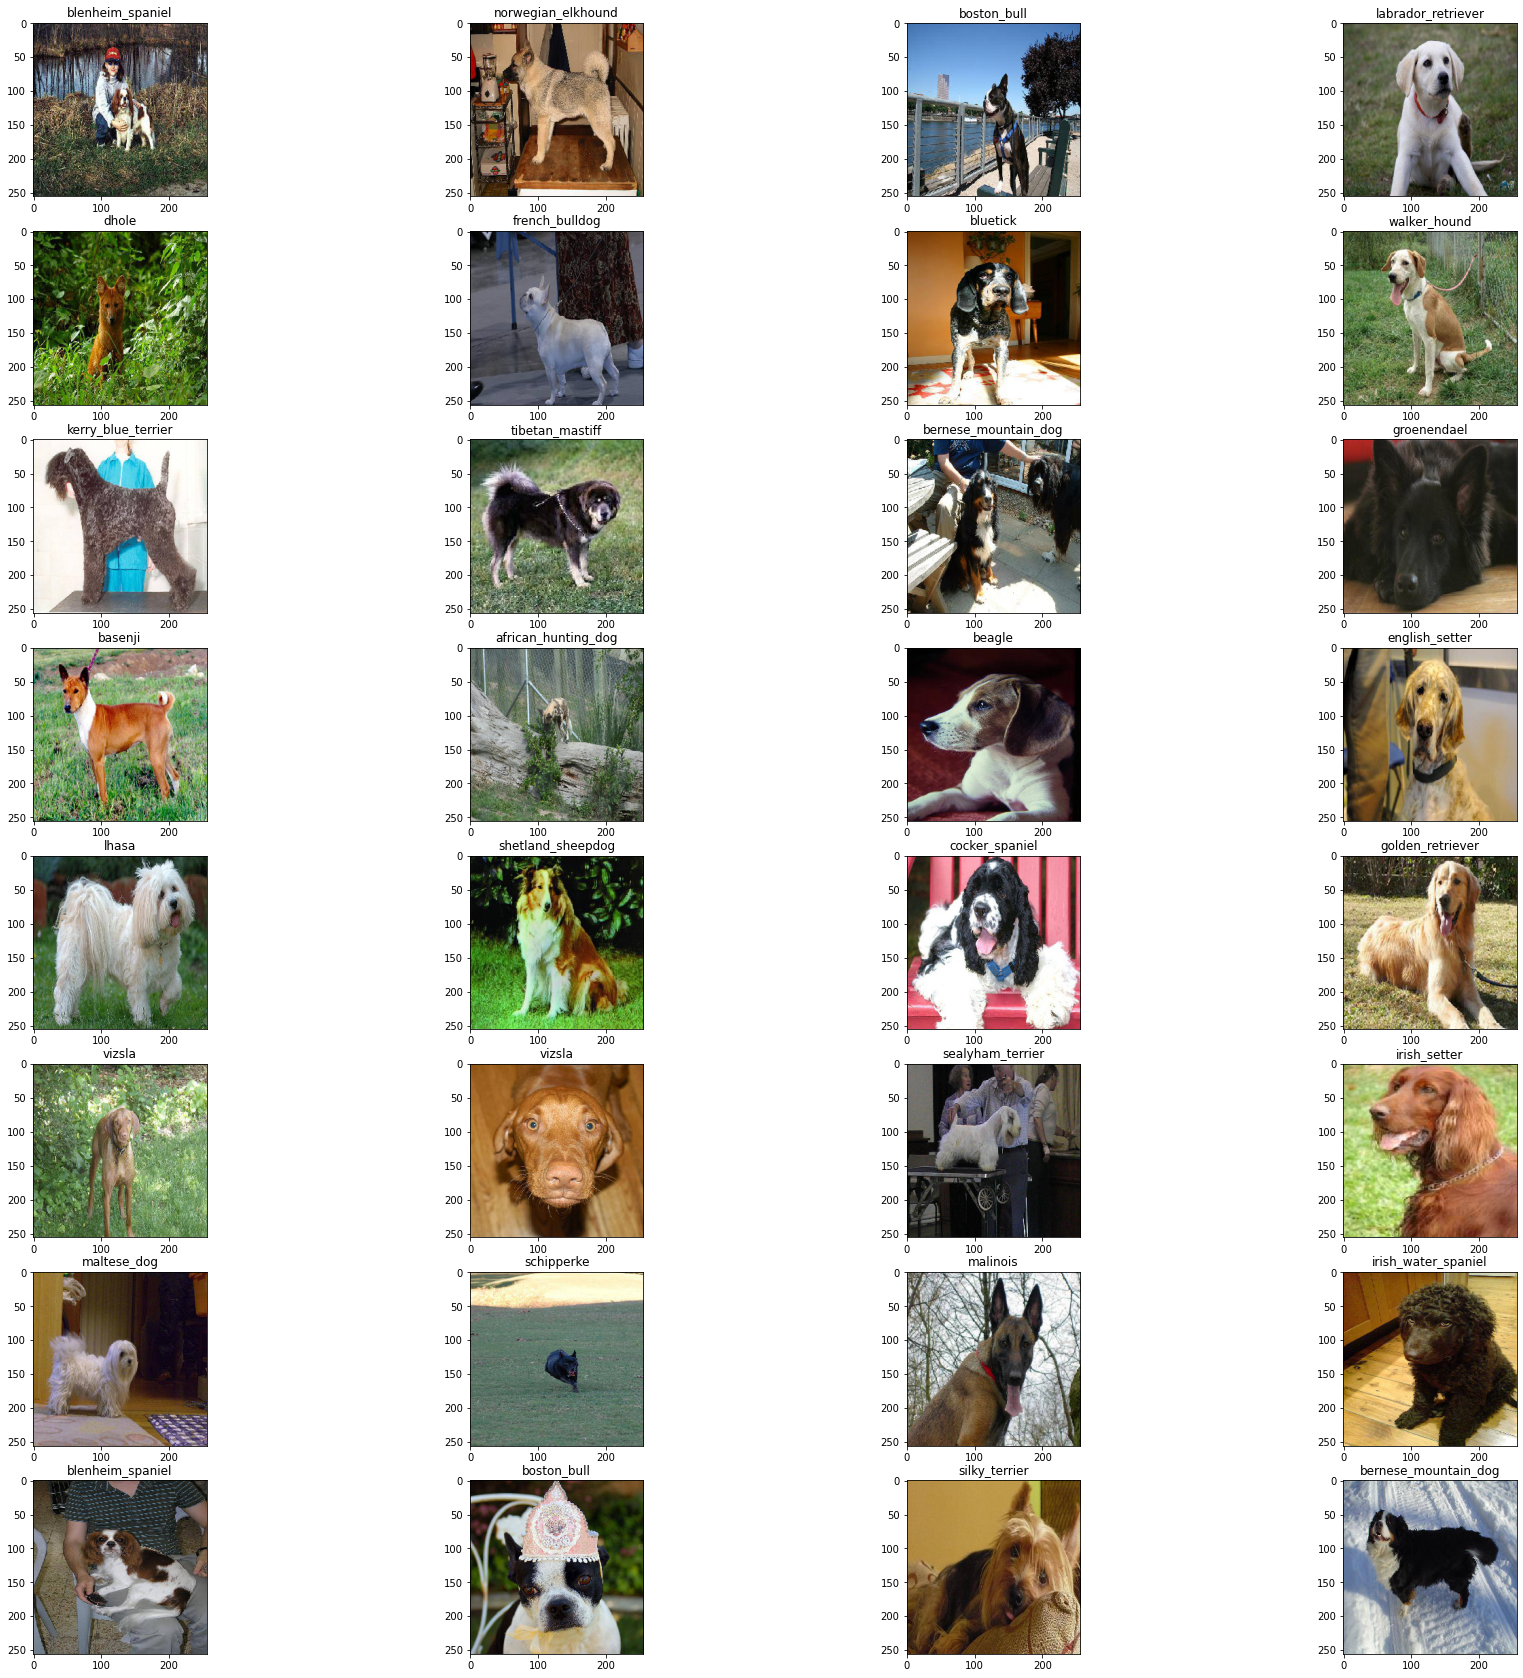

In [26]:
plt.figure(figsize=(30, 30))
columns = 4
rows = 8
for i in range(32):
    ax = plt.subplot(rows, columns, i+1)
    plt.imshow(images[i])
    plt.title(labels_list[label[i].argmax()])
plt.show()

# Building base model

In [27]:
from tensorflow.keras import layers
from tensorflow.keras import Model

In [28]:
img_input = layers.Input(shape=(256, 256, 3))

x = layers.Conv2D(16, 3, activation='relu')(img_input)
x = layers.MaxPooling2D(2)(x)

x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

x = layers.Conv2D(128, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

x = layers.Flatten()(x)

x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.3)(x)

output = layers.Dense(120, activation='softmax')(x)

model = Model(img_input, output)

In [29]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 254, 254, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 64)        0     

In [30]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam

model.compile(loss='categorical_crossentropy',
             optimizer=Adam(learning_rate=0.001),
             metrics=['acc'])

In [31]:
history = model.fit(train_generator,
                         steps_per_epoch=125,
                          epochs=20,
                          validation_data=val_generator,
                          validation_steps=62,
                          verbose=1
                         )

Epoch 1/20
125/125 [==============================] - 60s 439ms/step - loss: 4.7956 - acc: 0.0115 - val_loss: 4.7854 - val_acc: 0.0126
Epoch 2/20
125/125 [==============================] - 54s 434ms/step - loss: 4.7839 - acc: 0.0108 - val_loss: 4.7785 - val_acc: 0.0055
Epoch 3/20
125/125 [==============================] - 54s 430ms/step - loss: 4.7625 - acc: 0.0144 - val_loss: 4.7405 - val_acc: 0.0146
Epoch 4/20
125/125 [==============================] - 54s 434ms/step - loss: 4.7176 - acc: 0.0174 - val_loss: 4.7397 - val_acc: 0.0151
Epoch 5/20
125/125 [==============================] - 55s 437ms/step - loss: 4.6771 - acc: 0.0188 - val_loss: 4.6303 - val_acc: 0.0237
Epoch 6/20
125/125 [==============================] - 54s 432ms/step - loss: 4.6238 - acc: 0.0282 - val_loss: 4.5630 - val_acc: 0.0323
Epoch 7/20
125/125 [==============================] - 53s 427ms/step - loss: 4.5652 - acc: 0.0324 - val_loss: 4.5250 - val_acc: 0.0378
Epoch 8/20
125/125 [==============================] - 5

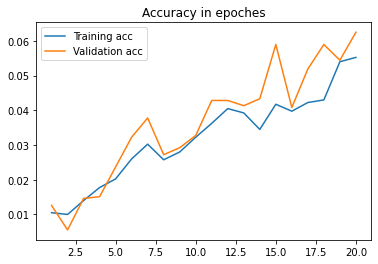

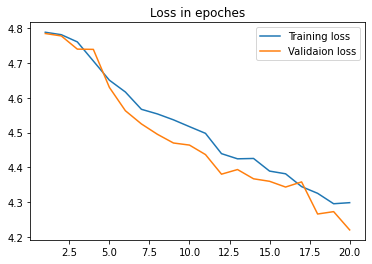

In [33]:
epochs = np.arange(1, 21, 1)

plt.plot(epochs, history.history["acc"], label="Training acc")
plt.plot(epochs, history.history["val_acc"], label="Validation acc")
plt.title("Accuracy in epoches")
plt.legend()
plt.show();

plt.plot(epochs, history.history["loss"], label="Training loss")
plt.plot(epochs, history.history["val_loss"], label="Validaion loss")
plt.title("Loss in epoches")
plt.legend()
plt.show();

In [34]:
img_input = layers.Input(shape=(256, 256, 3))

x = layers.Conv2D(16, 3, activation='relu')(img_input)
x = layers.MaxPooling2D(2)(x)

x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

x = layers.Conv2D(128, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

x = layers.Conv2D(256, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

x = layers.Flatten()(x)

x = layers.Dense(2048, activation='relu')(x)
x = layers.Dropout(0.4)(x)

output = layers.Dense(120, activation='softmax')(x)

model = Model(img_input, output)

In [35]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 254, 254, 16)      448       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 127, 127, 16)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 125, 125, 32)      4640      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 60, 60, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 30, 30, 64)        0   

In [36]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='categorical_crossentropy',
             optimizer=RMSprop(lr=0.01),
             metrics=['acc'])

In [37]:
history = model.fit(train_generator,
                         steps_per_epoch=125,
                          epochs=20,
                          validation_data=val_generator,
                          validation_steps=62,
                          verbose=1
                         )

Epoch 1/20
125/125 [==============================] - 54s 431ms/step - loss: 2737.1388 - acc: 0.0120 - val_loss: 4.7905 - val_acc: 0.0111
Epoch 2/20
125/125 [==============================] - 53s 428ms/step - loss: 4.7882 - acc: 0.0128 - val_loss: 4.7865 - val_acc: 0.0086
Epoch 3/20
125/125 [==============================] - 51s 411ms/step - loss: 4.7844 - acc: 0.0127 - val_loss: 4.7931 - val_acc: 0.0106
Epoch 4/20
125/125 [==============================] - 52s 417ms/step - loss: 4.7828 - acc: 0.0146 - val_loss: 4.7892 - val_acc: 0.0101
Epoch 5/20
125/125 [==============================] - 52s 413ms/step - loss: 4.7776 - acc: 0.0113 - val_loss: 4.7924 - val_acc: 0.0086
Epoch 6/20
125/125 [==============================] - 54s 429ms/step - loss: 4.7806 - acc: 0.0145 - val_loss: 4.7966 - val_acc: 0.0111
Epoch 7/20
125/125 [==============================] - 53s 421ms/step - loss: 4.7766 - acc: 0.0093 - val_loss: 4.7998 - val_acc: 0.0116
Epoch 8/20
125/125 [==============================] 

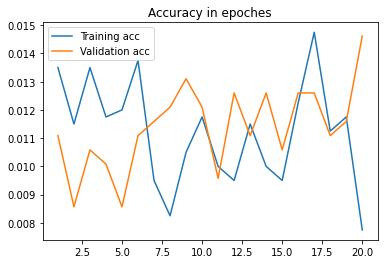

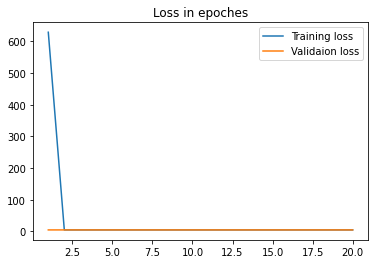

In [40]:
epochs = np.arange(1, 21, 1)

plt.plot(epochs, history.history["acc"], label="Training acc")
plt.plot(epochs, history.history["val_acc"], label="Validation acc")
plt.title("Accuracy in epoches")
plt.legend()
plt.show();

plt.plot(epochs, history.history["loss"], label="Training loss")
plt.plot(epochs, history.history["val_loss"], label="Validaion loss")
plt.title("Loss in epoches")
plt.legend()
plt.show();

# Using Inception V3 pretrained model

In [41]:
from tensorflow.keras.applications import InceptionV3

inception = InceptionV3(
    include_top=False,
    weights='imagenet',
    input_shape=(256,256,3),
    pooling=None,
    classes=120)

87916544/87910968 [==============================] - 2s 0us/step


In [42]:
inception.summary()

[0]              
__________________________________________________________________________________________________
conv2d_78 (Conv2D)              (None, 14, 14, 192)  147456      average_pooling2d_6[0][0]        
__________________________________________________________________________________________________
batch_normalization_60 (BatchNo (None, 14, 14, 192)  576         conv2d_69[0][0]                  
__________________________________________________________________________________________________
batch_normalization_63 (BatchNo (None, 14, 14, 192)  576         conv2d_72[0][0]                  
__________________________________________________________________________________________________
batch_normalization_68 (BatchNo (None, 14, 14, 192)  576         conv2d_77[0][0]                  
__________________________________________________________________________________________________
batch_normalization_69 (BatchNo (None, 14, 14, 192)  576         conv2d_78[0][0]           

In [43]:
for layer in inception.layers:
    layer.trainable = False

In [44]:
inputs = layers.Input(shape=(256, 256, 3))
x = layers.experimental.preprocessing.Rescaling(scale = 1,offset=-1)(inputs)
x = inception(x, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.2)(x)
outputs = layers.Dense(120, activation='softmax')(x)

model = Model(inputs, outputs)

In [45]:
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
rescaling (Rescaling)        (None, 256, 256, 3)       0         
_________________________________________________________________
inception_v3 (Functional)    (None, 6, 6, 2048)        21802784  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 120)               245880    
Total params: 22,048,664
Trainable params: 245,880
Non-trainable params: 21,802,784
_________________________________________

In [46]:
from tensorflow.keras.optimizers import Adam

base_learning_rate = 0.0001

model.compile(optimizer=Adam(lr=base_learning_rate),
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [47]:
len(model.trainable_variables)

2

In [48]:
initial_epochs = 10

loss0, accuracy0 = model.evaluate(val_generator)

70/70 [==============================] - 11s 110ms/step - loss: 5.0787 - accuracy: 0.0103


In [49]:
print("initial loss: {:.2f}".format(loss0))
print("Initial accuracy: {:.2f}".format(accuracy0))

initial loss: 5.05
Initial accuracy: 0.01


In [50]:
history = model.fit(train_generator,
                    steps_per_epoch=250,
                   epochs=initial_epochs,
                   validation_data=val_generator,
                   validation_steps=69,
                   verbose=1)

Epoch 1/10
250/250 [==============================] - 110s 426ms/step - loss: 3.9926 - accuracy: 0.1916 - val_loss: 2.7232 - val_accuracy: 0.5870
Epoch 2/10
250/250 [==============================] - 105s 420ms/step - loss: 2.3939 - accuracy: 0.5472 - val_loss: 1.5672 - val_accuracy: 0.7491
Epoch 3/10
250/250 [==============================] - 103s 414ms/step - loss: 1.6446 - accuracy: 0.6614 - val_loss: 1.0675 - val_accuracy: 0.8057
Epoch 4/10
250/250 [==============================] - 106s 423ms/step - loss: 1.3034 - accuracy: 0.7020 - val_loss: 0.8465 - val_accuracy: 0.8238
Epoch 5/10
250/250 [==============================] - 104s 418ms/step - loss: 1.1446 - accuracy: 0.7159 - val_loss: 0.7388 - val_accuracy: 0.8216
Epoch 6/10
250/250 [==============================] - 102s 409ms/step - loss: 1.0308 - accuracy: 0.7301 - val_loss: 0.6673 - val_accuracy: 0.8311
Epoch 7/10
250/250 [==============================] - 103s 412ms/step - loss: 0.9685 - accuracy: 0.7436 - val_loss: 0.6214 -

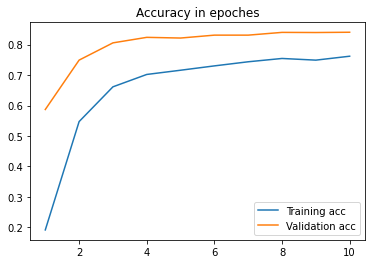

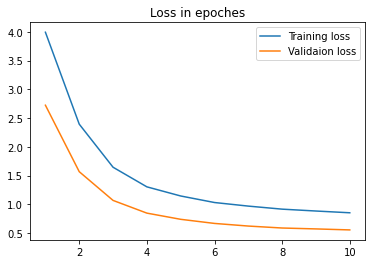

In [51]:
epochs = np.arange(1, initial_epochs + 1, 1)

plt.plot(epochs, history.history["accuracy"], label="Training acc")
plt.plot(epochs, history.history["val_accuracy"], label="Validation acc")
plt.title("Accuracy in epoches")
plt.legend()
plt.show();

plt.plot(epochs, history.history["loss"], label="Training loss")
plt.plot(epochs, history.history["val_loss"], label="Validaion loss")
plt.title("Loss in epoches")
plt.legend()
plt.show();

# Fine tuning

## Unfreezing base model layers

In [52]:
for layer in inception.layers:
    layer.trainable = True

In [53]:
print('Number of layers in base model: ', len(inception.layers))

Number of layers in base model:  311


In [54]:
inception.summary()

[0]              
__________________________________________________________________________________________________
conv2d_78 (Conv2D)              (None, 14, 14, 192)  147456      average_pooling2d_6[0][0]        
__________________________________________________________________________________________________
batch_normalization_60 (BatchNo (None, 14, 14, 192)  576         conv2d_69[0][0]                  
__________________________________________________________________________________________________
batch_normalization_63 (BatchNo (None, 14, 14, 192)  576         conv2d_72[0][0]                  
__________________________________________________________________________________________________
batch_normalization_68 (BatchNo (None, 14, 14, 192)  576         conv2d_77[0][0]                  
__________________________________________________________________________________________________
batch_normalization_69 (BatchNo (None, 14, 14, 192)  576         conv2d_78[0][0]           

In [55]:
fine_tune_at=260

for layer in inception.layers[:fine_tune_at]:
    layer.trainable = False

In [56]:
inception.summary()

              
__________________________________________________________________________________________________
conv2d_78 (Conv2D)              (None, 14, 14, 192)  147456      average_pooling2d_6[0][0]        
__________________________________________________________________________________________________
batch_normalization_60 (BatchNo (None, 14, 14, 192)  576         conv2d_69[0][0]                  
__________________________________________________________________________________________________
batch_normalization_63 (BatchNo (None, 14, 14, 192)  576         conv2d_72[0][0]                  
__________________________________________________________________________________________________
batch_normalization_68 (BatchNo (None, 14, 14, 192)  576         conv2d_77[0][0]                  
__________________________________________________________________________________________________
batch_normalization_69 (BatchNo (None, 14, 14, 192)  576         conv2d_78[0][0]              

In [57]:
model.compile(loss='categorical_crossentropy',
             optimizer = RMSprop(lr=base_learning_rate/10),
              metrics=['accuracy'])

In [58]:
len(model.trainable_variables)

30

In [59]:
fine_tune_epochs = 10

total_epochs = initial_epochs + fine_tune_epochs

history_fine = model.fit(train_generator,
                        steps_per_epoch=250,
                        epochs=total_epochs,
                        initial_epoch=history.epoch[-1],
                        validation_data=val_generator,
                        validation_steps=69,
                        verbose=1)

Epoch 10/20
250/250 [==============================] - 112s 428ms/step - loss: 0.8041 - accuracy: 0.7630 - val_loss: 0.5084 - val_accuracy: 0.8397
Epoch 11/20
250/250 [==============================] - 106s 425ms/step - loss: 0.7337 - accuracy: 0.7818 - val_loss: 0.5020 - val_accuracy: 0.8428
Epoch 12/20
250/250 [==============================] - 109s 437ms/step - loss: 0.6837 - accuracy: 0.7961 - val_loss: 0.4997 - val_accuracy: 0.8401
Epoch 13/20
250/250 [==============================] - 107s 426ms/step - loss: 0.6888 - accuracy: 0.7924 - val_loss: 0.5012 - val_accuracy: 0.8388
Epoch 14/20
250/250 [==============================] - 107s 429ms/step - loss: 0.6438 - accuracy: 0.8043 - val_loss: 0.5019 - val_accuracy: 0.8347
Epoch 15/20
250/250 [==============================] - 107s 428ms/step - loss: 0.6136 - accuracy: 0.8080 - val_loss: 0.5029 - val_accuracy: 0.8333
Epoch 16/20
250/250 [==============================] - 106s 424ms/step - loss: 0.5991 - accuracy: 0.8069 - val_loss: 0

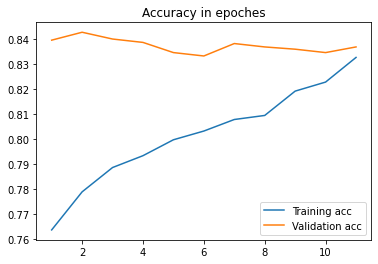

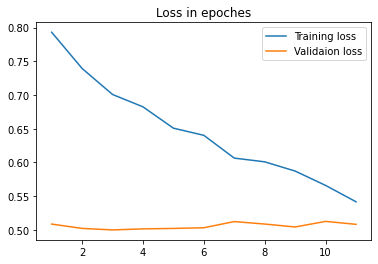

In [60]:
epochs = np.arange(1, 12, 1)

plt.plot(epochs, history_fine.history["accuracy"], label="Training acc")
plt.plot(epochs, history_fine.history["val_accuracy"], label="Validation acc")
plt.title("Accuracy in epoches")
plt.legend()
plt.show();

plt.plot(epochs, history_fine.history["loss"], label="Training loss")
plt.plot(epochs, history_fine.history["val_loss"], label="Validaion loss")
plt.title("Loss in epoches")
plt.legend()
plt.show();

# Saving model

In [61]:
import time

In [63]:
model.save('/models/keras_inceptionv3_fine_tuned_' + time.strftime("%Y%m%d-%H%M%S"))

INFO:tensorflow:Assets written to: /models/keras_inceptionv3_fine_tuned_20210309-224504/assets
